In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
from matplotlib import pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
plt.style.use('dark_background')

In [2]:
def RMSE(y,y_hat):
    return ((y-y_hat)**2).sum()/len(y)
def MAE(y,y_hat):
    return (abs(y-y_hat).sum())/len(y)
def evaluate_model(model,X_train,X_test,y_train,y_test,reshape=False):
    model     = model.fit(X_train,y_train)
    predicted = model.predict(X_test)
    print(f'Training R2:\n\t{model.score(X_train,y_train)}')
    print(f'Test R2:\n\t{model.score(X_test,y_test)}')
    return model.predict(X_test),model

In [3]:
X_train = pd.read_csv('X_train.csv').drop('HADM_ID',axis=1)
X_test  = pd.read_csv('X_test.csv').drop('HADM_ID',axis=1)
y_train = pd.read_csv('y_train.csv').drop('HADM_ID',axis=1)
y_test  = pd.read_csv('y_test.csv').drop('HADM_ID',axis=1)

X_train_pca = pd.read_csv('X_train_pca.csv').drop('Unnamed: 0',axis=1)
X_test_pca  = pd.read_csv('X_test_pca.csv').drop('Unnamed: 0',axis=1)

results = y_test.copy()

In [4]:
# following columns have same mean LoS accross all levels 
drop = ['SARCOIDOSIS',
        'PANCREATIC_CANCER',
        'GI_CANCER_OTHER',
        'RESPIRATORY_CANCER_OTHER',
        'THYROID_CANCER',
        'GOITER',
        'THYROID_DX_OTHER',
        'VITAMIN_DEFICIENCY',
        'MENTAL_DX_OTHER',
        'EMPHYSEMA',
        'OBSTRUCTIVE_PULMONARY_DX_OTHER',
        'COPD',
        'RESPIRATORY_DX_DT_EXTERNAL_AGENT',
        'LUNG_DX_DT_OTHER_DX',
        'TAG_SEIZURE',
        'TAG_HEART_FAILURE',
        'TAG_RESPIRATORY_FAILURE',
        'TAG_PULMONARY_EDEMA',
        'TAG_RENAL_OTHER',
        'TAG_BLEEDING_DX',
        'TAG_HEAD_TRAUMA',
        'TAG_METASTATIC_CANCER']

X_train = X_train.drop(drop,axis=1)
X_test = X_test.drop(drop,axis=1)

## Linear Regression

In [5]:
results['regression'],regression = evaluate_model(LinearRegression(),
                                                  X_train,
                                                  X_test,
                                                  y_train,
                                                  y_test, True)

print(f'Training RMSE:\n\t{RMSE(y_train.LOS, regression.predict(X_train).ravel())}')
print(f'Test RMSE:\n\t{RMSE(y_test.LOS,results.regression)}')

Training R2:
	0.5032475773059413
Test R2:
	0.4734882259479689
Training RMSE:
	75.78504926239938
Test RMSE:
	84.74773250545094


In [6]:
results['regression_pca'],regression_pca = evaluate_model(LinearRegression(),
                                                          X_train_pca,
                                                          X_test_pca,
                                                          y_train,
                                                          y_test, True)

print(f'Training RMSE:\n\t{RMSE(y_train.LOS, regression_pca.predict(X_train_pca).ravel())}')
print(f'Test RMSE:\n\t{RMSE(y_test.LOS, results.regression_pca)}')

Training R2:
	0.48390050792739203
Test R2:
	0.4648018413791435
Training RMSE:
	78.73665762695371
Test RMSE:
	86.14589952119093


## Lasso Regression

In [7]:
results['lasso'],lasso = evaluate_model(linear_model.Lasso(),
                                             X_train,X_test,y_train,y_test,True)
print(f'Training RMSE:\n\t{RMSE(y_train.LOS,lasso.predict(X_train).ravel())}')
print(f'Test RMSE:\n\t{RMSE(y_test.LOS,results.lasso)}')

Training R2:
	0.0
Test R2:
	-3.9736930160128026e-05
Training RMSE:
	152.56100584550964
Test RMSE:
	160.9671507779111


In [8]:
results['lasso_pca'],lasso_pca = evaluate_model(linear_model.Lasso(),
                                            X_train_pca,
                                            X_test_pca,
                                            y_train,
                                            y_test,True)
print(f'Training RMSE:\n\t{RMSE(y_train.LOS, lasso_pca.predict(X_train_pca).ravel())}')
print(f'Test RMSE:\n\t{RMSE(y_test.LOS, results.lasso_pca)}')

Training R2:
	0.0
Test R2:
	-3.9736930160128026e-05
Training RMSE:
	152.56100584550964
Test RMSE:
	160.9671507779111


## Ridge Regression

In [9]:
results['ridge'],ridge = evaluate_model(Ridge(),
                                             X_train,X_test,y_train,y_test,True)
print(f'Training RMSE:\n\t{RMSE(y_train.LOS,ridge.predict(X_train).ravel())}')
print(f'Test RMSE:\n\t{RMSE(y_test.LOS,results.ridge)}')

Training R2:
	0.5031227083593223
Test R2:
	0.47391999206133073
Training RMSE:
	75.80409939449444
Test RMSE:
	84.67823510599393


In [10]:
results['ridge_pca'],ridge_pca = evaluate_model(Ridge(),
                                                X_train_pca,
                                                X_test_pca,
                                                y_train,
                                                y_test, True)
print(f'Training RMSE:\n\t{RMSE(y_train.LOS, ridge_pca.predict(X_train_pca).ravel())}')
print(f'Test RMSE:\n\t{RMSE(y_test.LOS, results.ridge_pca)}')

Training R2:
	0.48389422323123077
Test R2:
	0.4647840194348468
Training RMSE:
	78.73761642652151
Test RMSE:
	86.148768154795


## Forest

In [11]:
results['forest'],forest = evaluate_model(RandomForestRegressor(),
                                          X_train,
                                          X_test,
                                          y_train.values.ravel(),
                                          y_test, True)
print(f'Training RMSE:\n\t{RMSE(y_train.LOS,forest.predict(X_train).ravel())}')
print(f'Test RMSE:\n\t{RMSE(y_test.LOS,results.forest)}')

Training R2:
	0.9293645891766724
Test R2:
	0.5184816608401233
Training RMSE:
	10.776209323517659
Test RMSE:
	77.50555526904046


In [12]:
results['forest_pca'],forest_pca = evaluate_model(RandomForestRegressor(),
                                                  X_train_pca,
                                                  X_test_pca,
                                                  y_train.values.ravel(),
                                                  y_test, True)
print(f'Training RMSE:\n\t{RMSE(y_train.LOS, forest_pca.predict(X_train_pca).ravel())}')
print(f'Test RMSE:\n\t{RMSE(y_test.LOS, results.forest_pca)}')

Training R2:
	0.9184784790546504
Test R2:
	0.44524046416860463
Training RMSE:
	12.43700523347832
Test RMSE:
	89.29451355980719


## Neural Net

In [13]:
results['net'],net = evaluate_model(MLPRegressor(),
                                    X_train,X_test,y_train.values.ravel(),y_test,True)
print(f'Training RMSE:\n\t{RMSE(y_train.LOS,net.predict(X_train).ravel())}')
print(f'Test RMSE:\n\t{RMSE(y_test.LOS,results.net)}')

/Users/Bova/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Training R2:
	0.833861878890986
Test R2:
	0.43735040360254895
Training RMSE:
	25.34619886567427
Test RMSE:
	90.56450366308226


In [14]:
results['net_pca'],net_pca = evaluate_model(MLPRegressor(),
                                            X_train_pca,
                                            X_test_pca,
                                            y_train.values.ravel(),
                                            y_test, True)
print(f'Training RMSE:\n\t{RMSE(y_train.LOS, net_pca.predict(X_train_pca).ravel())}')
print(f'Test RMSE:\n\t{RMSE(y_test.LOS,results.net_pca)}')

/Users/Bova/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Training R2:
	0.849884215322941
Test R2:
	0.44864597899153125
Training RMSE:
	22.901815103620063
Test RMSE:
	88.74635932379533


## Best

In [15]:
forest = RandomForestRegressor(max_depth       = 50 ,
                               max_features    = 100,
                               min_samples_leaf= 1  ,
                               n_estimators    = 200).fit(X_train,y_train.values.ravel())

results['best'] = forest.predict(X_test)

print(f'Training R2:\n\t{forest.score(X_train,y_train)}')
print(f'Test R2:\n\t{forest.score(X_test,y_test)}')    
print(f'Training RMSE:\n\t{RMSE(y_train.LOS,forest.predict(X_train).ravel())}')
print(f'Test RMSE:\n\t{RMSE(y_test.LOS,forest.predict(X_test).ravel())}')

Training R2:
	0.9328644124765375
Test R2:
	0.5374584327620806
Training RMSE:
	10.242272760608694
Test RMSE:
	74.45103973887102


## Compare

In [20]:
def difference(observed,predicted,n=13):
    return [len(results[abs(observed-predicted)<i])/len(observed) for i in range(n)]
def ratio(observed,predicted,n=21):
    return [len(results[(predicted/observed).round(1)==(i/10)])/len(results) for i in range(n)]

#models = ['regression','regression_pca','ridge','ridge_pca','lasso','lasso_pca',
#          'forest','forest_pca','net','net_pca','best']
models = ['regression','ridge','lasso','forest','net','best']

differences = pd.DataFrame({f"{m.upper().replace('_',' ')}": difference(results.LOS,results[m]) 
                            for m in models}, index = [i for i in range(13)])

ratios = pd.DataFrame({f"{m.upper().replace('_',' ')}": ratio(results.LOS,results[m]) 
                       for m in models}, index = [i/10 for i in range(21)])


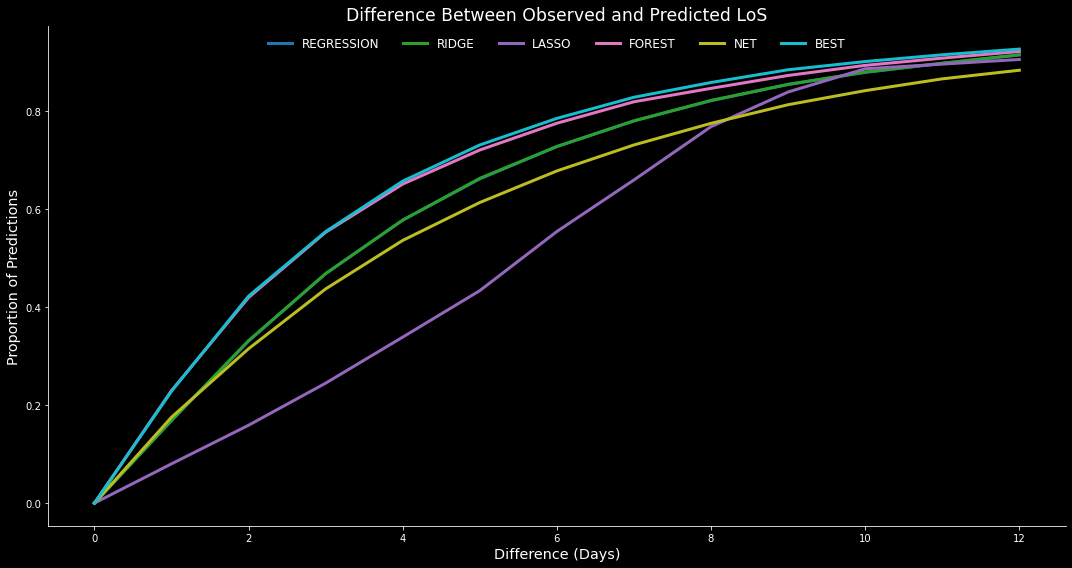

In [42]:
differences.plot(figsize  = (15,8),
                 linewidth=  3    ,
                 colormap='tab10')
plt.title('Difference Between Observed and Predicted LoS',
          fontdict={'fontsize':'xx-large'})
plt.xlabel('Difference (Days)',
          fontdict={'fontsize':'x-large'})
plt.ylabel('Proportion of Predictions',
          fontdict={'fontsize':'x-large'})

plt.legend(frameon=False,
           fontsize='large',
           ncol=6,
           loc='upper center')
sns.despine()
plt.tight_layout()

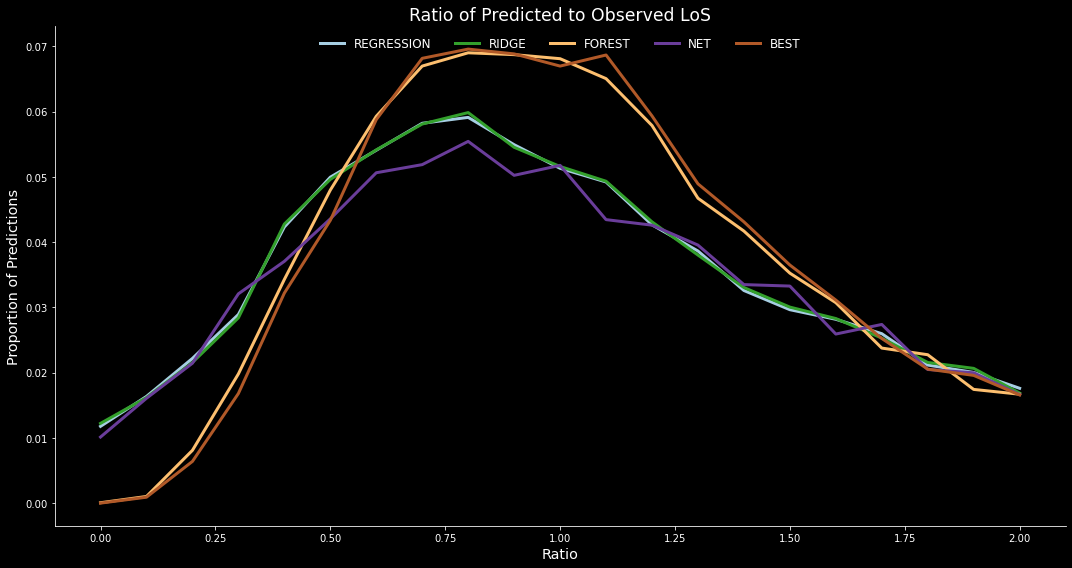

In [44]:
ratios.drop(['LASSO'],axis=1).plot(figsize = (15,8),
            linewidth=  3    ,
            colormap = 'Paired')
plt.title('Ratio of Predicted to Observed LoS',
          fontdict={'fontsize':'xx-large'})
plt.xlabel('Ratio',
          fontdict={'fontsize':'x-large'})
plt.ylabel('Proportion of Predictions',
          fontdict={'fontsize':'x-large'})

plt.legend(frameon=False,
           ncol=5,
           loc='upper center')
sns.despine()
plt.tight_layout()

plt.legend(frameon=False,
           fontsize='large',
           ncol=5,
           loc='upper center')
sns.despine()
plt.tight_layout()

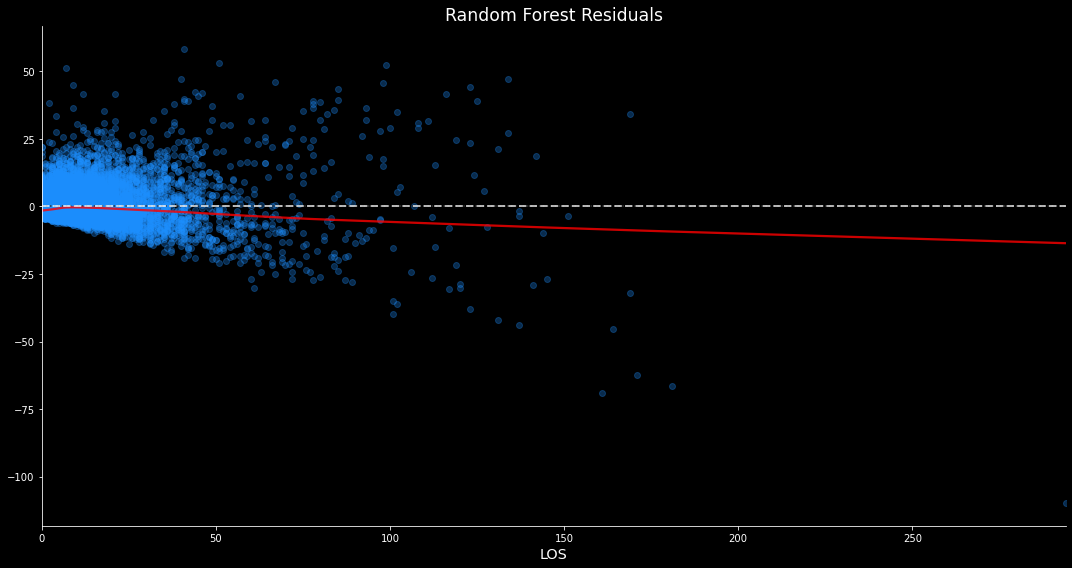

In [66]:
plt.figure(figsize = (15,8))
ax = sns.residplot(x='LOS',
                   y='best',
                   data=results,
                   lowess=True,
                   scatter_kws={'color':'dodgerblue',
                                'alpha':0.3},
                   line_kws={'color':'red',
                             'alpha':0.8})

ax.axhline(0,
           color='white',
           linestyle='--',
           linewidth=2,
           alpha=0.7)


plt.title('Random Forest Residuals',
          fontdict={'fontsize':'xx-large'})
plt.xlabel('LOS',
          fontdict={'fontsize':'x-large'})
plt.ylabel('')

sns.despine()
plt.tight_layout()

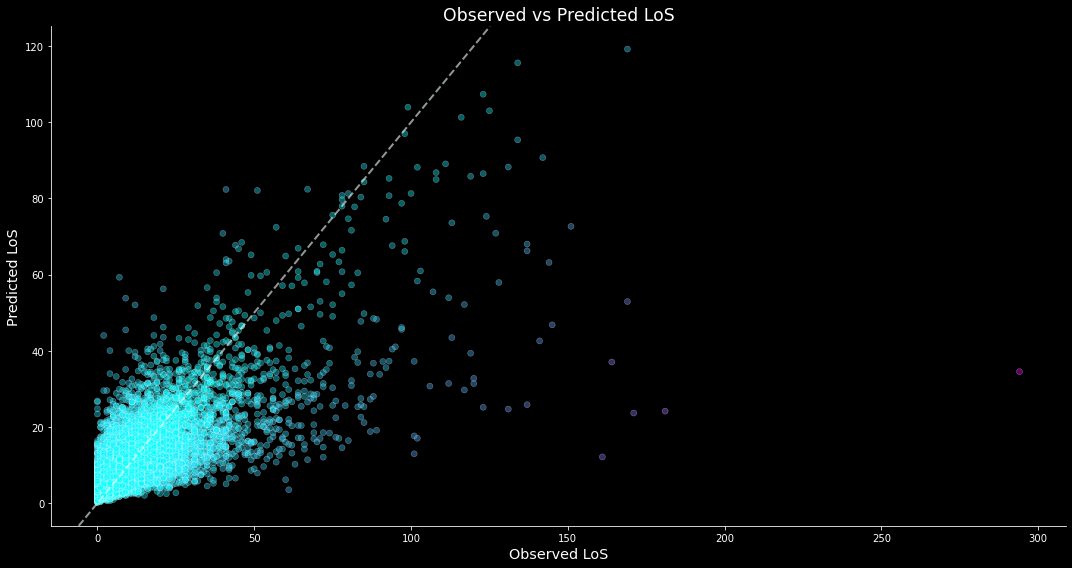

In [74]:
plt.figure(figsize = (15,8))
ax = sns.scatterplot(data   = results                        ,
                     x      = 'LOS'                          ,
                     y      = 'best'                       ,
                     hue    = abs(results.LOS-results.forest),
                     palette= 'cool'                         ,
                     alpha  = 0.4                            )

ax.axline(xy1       = (0,0)     ,
          slope     = 1         ,
          color     = 'azure'   ,
          linestyle = '--'      , 
          linewidth = 2         ,
          alpha     = 0.6       ,
          zorder    = 3         )
plt.title('Observed vs Predicted LoS',
          fontdict={'fontsize':'xx-large'})
plt.xlabel('Observed LoS',
          fontdict={'fontsize':'x-large'})
plt.ylabel('Predicted LoS',
          fontdict={'fontsize':'x-large'})

plt.legend([],[], frameon=False)
sns.despine()
plt.tight_layout()